# NOAA Dataset - Results
### <i>Experiment 2.4 - Boosting Algorithms vs Random Forest using Neighborhood Cleaning Rule (downsample)</i> 
<hr>

In [1]:
###### importing dependencies #############################################
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from cryptoaml.utils import read_pickle
from IPython.core.display import display, HTML
from cryptoaml.metrics import (
    results_table, 
    plot_metric_dist,
    plot_feature_imp,
    print_model_params, 
    plot_result_matrices,
    display_metrics_stats,
    elliptic_time_indexed_results
)

###### constants ##########################################################
EXP_RESULT_PATH         = "persistence/experiment_2.4/results"
BENCHMARK_RESULTS       = "{}/{}".format(EXP_RESULT_PATH, "benchmark_model_results.pkl")
BENCHMARK_TUNED_RESULTS = "{}/{}".format(EXP_RESULT_PATH, "tuned_benchmark_results.pkl")
DEFAULT_RESULTS         = "{}/{}".format(EXP_RESULT_PATH, "defaults_models_results.pkl")
TUNED_RESULTS           = "{}/{}".format(EXP_RESULT_PATH, "tuned_models_iter_results.pkl")

<a id='benchmark'></a>
## Benchmark Models

Experiment performed on the [elliptic dataset](https://www.kaggle.com/ellipticco/elliptic-data-set) [1,2]

Models were tested on the following feature sets:
- Local Features (LF)
- Local Features and Node Embeddings extracted from GCN (LF_NE) 
- All Features - Aggregated Features and Local Features (AF)
- All Features and Node Embeddings extracted from GCN (AF_NE) 

__Results obtained in the original paper [2]__

<table style="border-collapse:collapse;border-spacing:0;border-color:#ccc" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top" rowspan="2"><br><br>Method<br></th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top" colspan="3">Illicit</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top">MicroAVG</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">Precision</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">Recall</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">F1</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">F1</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(AF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.404</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.593</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.481</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.931</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.537</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.528</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.533</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.945</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.348</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.668</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.457</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.920</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.518</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.571</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.543</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.945</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(AF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.956</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.670</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.788</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.977</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.971</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.675</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.796</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.978</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.803</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.611</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.694</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.966</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.874</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.668</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.759</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.973</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP (<span style="font-style:italic">AF</span>)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.694</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.617</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.653</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.962</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.780</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.617</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.689</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.967</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.637</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.662</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.649</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.958</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.6819</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.5782</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.6258</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.986</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">GCN</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.812</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.512</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.628</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.961</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">Skip-GCN</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.812</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.623</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.705</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.966</td></tr></table>

<img width="100%" src="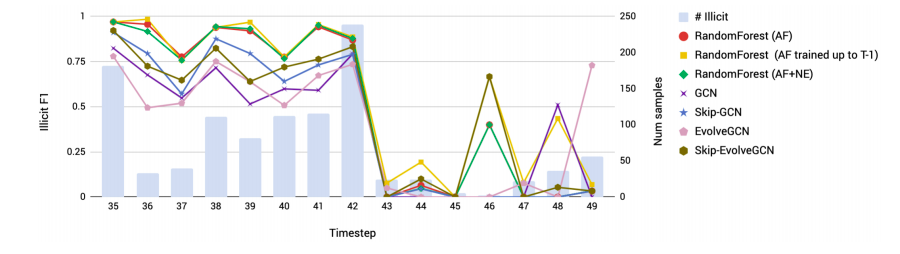
">

<small>
    <i>
   Illicit F1 results over test time span from benchmark paper [2].
    </i>
</small>

### Random Forest - Default Hyperparameters 

In [2]:
# load results for benchmark model
benchmark_model = "random_forest"
benchmark_results = read_pickle(BENCHMARK_RESULTS)

####  RF Default Hyperparameters - Evaluation Metrics

- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper. The results reproduce are very close to the ones documented in the benchmark paper [2], shown in the previous section. In our test run we managed to obtain higher results using the same hyperparameters specified.
    </i>
</small>

In [3]:
# dataframe with all the perfomance metrics
print("Performance metrics for benchmark model")
benchmark_metrics_df = results_table(benchmark_results)
display(benchmark_metrics_df)

# sorted by f1 score
print("Performance metrics for benchmark model sorted by f1-score")
display(benchmark_metrics_df.sort_values("f1", ascending=False))

Performance metrics for benchmark model


,model,precision,recall,f1_micro,accuracy,auc,f1
0,random_forest_ALL,0.61,0.799,0.746,0.746,0.757,0.692


Performance metrics for benchmark model sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
0,random_forest_ALL,0.61,0.799,0.746,0.746,0.757,0.692


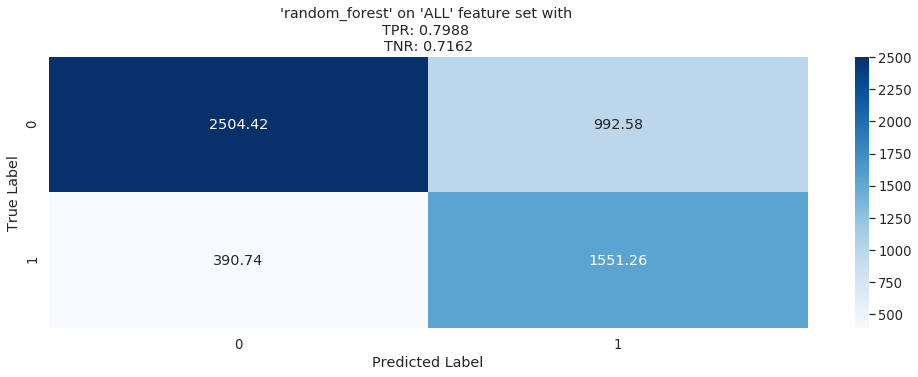

In [4]:
plot_result_matrices(benchmark_results, figsize=(17,5))

### Random Forest  - Tuned Hyperparameters 

In [5]:
benchmark_tuned_results = read_pickle(BENCHMARK_TUNED_RESULTS)

#### RF Tuned Hyperparameters - Evaluation Metrics
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [6]:
print("Performance metrics for RF benchmark model with tuned hyperparameters")
benchmark_tuned_metrics_df = results_table(benchmark_tuned_results)
display(benchmark_tuned_metrics_df)

Performance metrics for RF benchmark model with tuned hyperparameters


,model,precision,recall,f1_micro,accuracy,auc,f1
0,random_forest_ALL,0.609,0.803,0.746,0.746,0.759,0.693


####  RF Tuned Hyperparameters - Confusion Matrix

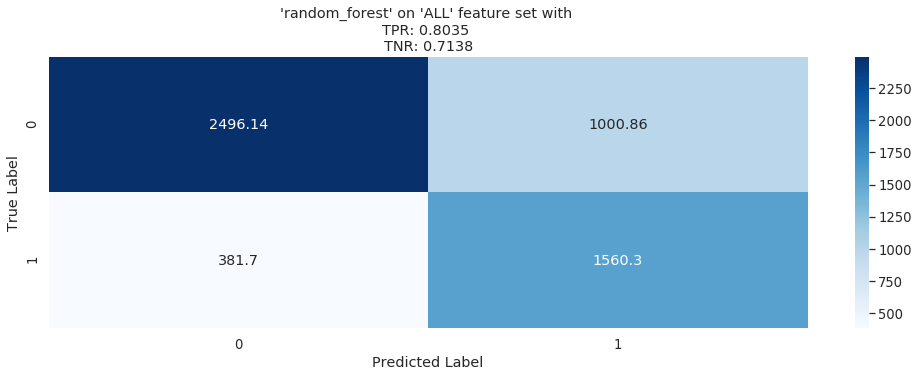

In [7]:
plot_result_matrices(benchmark_tuned_results, figsize=(17,5))

#### RF Tuned Hyperparameters - Hyperparameters

In [8]:
print_model_params(benchmark_tuned_results)

Parameters used for 'random_forest' on 'ALL' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'log2',
    'max_leaf_nodes': None,
    'max_samples': 0.9915293070816315,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 800,
    'n_jobs': None,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


### Boosting Algorithms - Default Hyperparameters 

In [9]:
default_results = read_pickle(DEFAULT_RESULTS)

#### Boosting Default Hyperparameters - Evaluation Metrics
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [10]:
print("Performance metrics for defaults boosting models")
defaults_metrics_df = results_table(default_results)
display(defaults_metrics_df)

print("Performance metrics for defaults boosting models sorted by f1-score")
display(defaults_metrics_df.sort_values("f1", ascending=False))

Performance metrics for defaults boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_ALL,0.602,0.827,0.743,0.743,0.762,0.697
1,light_boost_ALL,0.587,0.854,0.733,0.733,0.760,0.696
2,cat_boost_ALL,0.613,0.823,0.752,0.752,0.767,0.703


Performance metrics for defaults boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
2,cat_boost_ALL,0.613,0.823,0.752,0.752,0.767,0.703
0,xg_boost_ALL,0.602,0.827,0.743,0.743,0.762,0.697
1,light_boost_ALL,0.587,0.854,0.733,0.733,0.760,0.696


#### Boosting Default Hyperparameters - Confusion Matrices

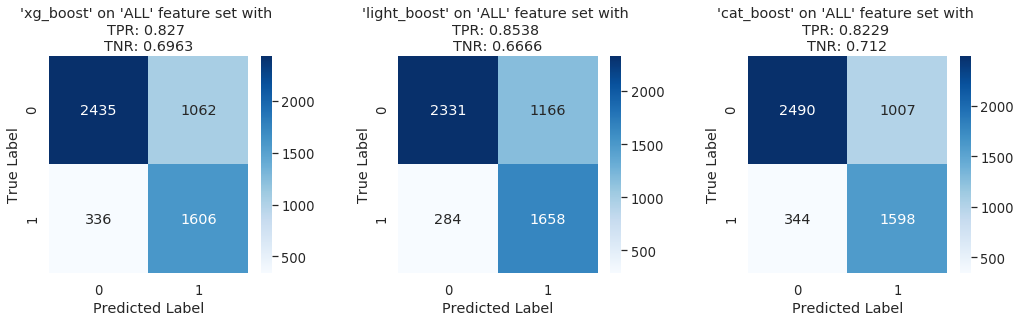

In [11]:
plot_result_matrices(default_results, figsize=(17,4), columns=3)

 ### Boosting Algorithms - Tuned Hyperparameters 

In [12]:
tuned_results = read_pickle(TUNED_RESULTS)

#### Boosting Tuned Hyperparameters - Evaluation Metrics
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [13]:
# dataframe with all the perfomance metrics
print("Performance metrics for tuned boosting models")
tuned_metrics_df = results_table(tuned_results)
display(tuned_metrics_df)

# sorted by f1 score/home/delinvas/repos/aml-crypto-graph/src/cryptoaml/datareader/_elliptic_dr.py
print("Performance metrics for tuned boosting models sorted by f1-score")
display(tuned_metrics_df.sort_values("f1", ascending=False))

Performance metrics for tuned boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_ALL,0.606,0.829,0.746,0.746,0.765,0.700
1,light_boost_ALL,0.613,0.824,0.752,0.752,0.768,0.703


Performance metrics for tuned boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
1,light_boost_ALL,0.613,0.824,0.752,0.752,0.768,0.703
0,xg_boost_ALL,0.606,0.829,0.746,0.746,0.765,0.700


#### Boosting Tuned Hyperparameters - Confusion Matrices

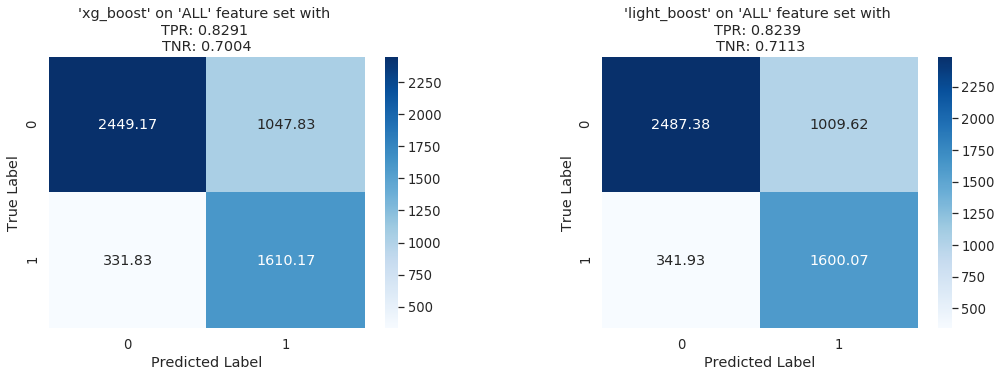

In [14]:
plot_result_matrices(tuned_results, figsize=(17,5))

#### Boosting Tuned Hyperparameters - Hyperparameters

In [15]:
print_model_params(tuned_results)

Parameters used for 'xg_boost' on 'ALL' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 0.8599759362813014,
    'colsample_bynode': 1,
    'colsample_bytree': 0.6941519525284879,
    'gamma': 4.2937561466681195e-06,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.050927485269579784,
    'max_delta_step': 0,
    'max_depth': 9,
    'min_child_weight': 0.009673382756603283,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 2638,
    'n_jobs': 16,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 9.539856882337921e-05,
    'reg_lambda': 1.1330084820491268e-05,
    'scale_pos_weight': 1,
    'subsample': 0.8850022065964945,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'light_boost' on 'ALL' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.7105710021662228,
    'importance_type': 'split',
    'learning_rate': 0.013352049256900976,
    'max_depth': -1,
    'min_child_samples': 54,
    'min_child_weight': 0.008626487671101805,
    'min_split_gain': 0.0,
    'n_estimators': 2078,
    'n_jobs': 16,
    'num_leaves': 549,
    'objective': None,
    'random_state': 0,
    'reg_alpha': 5.632256703697636e-06,
    'reg_lambda': 0.01828152288737052,
    'silent': True,
    'subsample': 0.8109380992594621,
    'subsample_for_bin': 200000,
    'subsample_freq': 1}


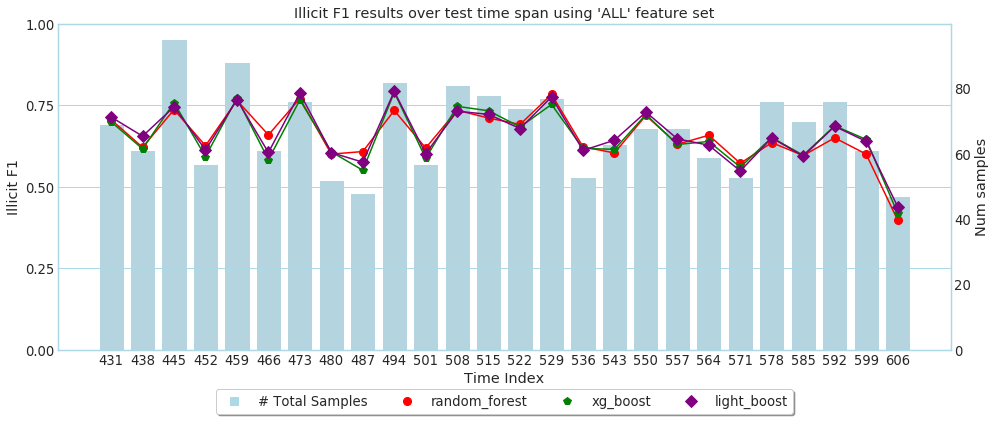

In [16]:
tmp_results = {**benchmark_tuned_results, **tuned_results}

N=7
x = tmp_results["random_forest"]["ALL"]["time_metrics"]
df = pd.DataFrame() 
df["timestep"] = x["timestep"].groupby(x.index // N).max()
df["score"] = x["score"].groupby(x.index // N).mean()
df["total_pos_label"] = x["total_pos_label"].groupby(x.index // N).sum()
tmp_results["random_forest"]["ALL"]["time_metrics"] = df

x = tmp_results["xg_boost"]["ALL"]["time_metrics"]
df = pd.DataFrame() 
df["timestep"] = x["timestep"].groupby(x.index // N).max()
df["score"] = x["score"].groupby(x.index // N).mean()
df["total_pos_label"] = x["total_pos_label"].groupby(x.index // N).sum()
tmp_results["xg_boost"]["ALL"]["time_metrics"] = df

x = tmp_results["light_boost"]["ALL"]["time_metrics"]
df = pd.DataFrame() 
df["timestep"] = x["timestep"].groupby(x.index // N).max()
df["score"] = x["score"].groupby(x.index // N).mean()
df["total_pos_label"] = x["total_pos_label"].groupby(x.index // N).sum()
tmp_results["light_boost"]["ALL"]["time_metrics"] = df

elliptic_time_indexed_results(tmp_results)

# Box-Plots

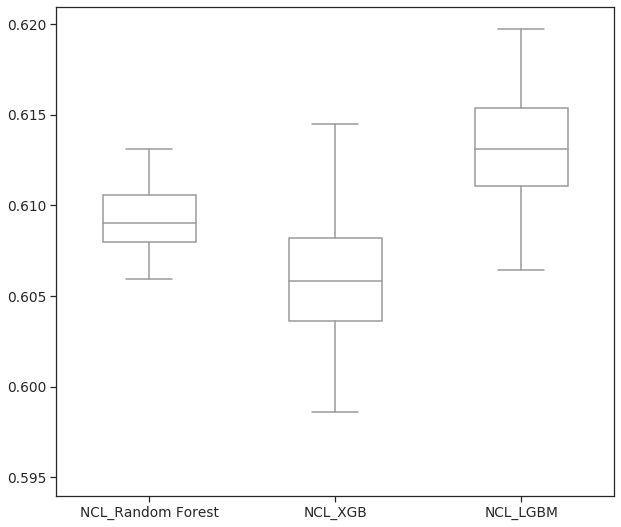

In [18]:
rf_f1_scores = benchmark_tuned_results["random_forest"]["ALL"]["metrics_iterations"]["precision"].values
xgb_f1_scores = tuned_results["xg_boost"]["ALL"]["metrics_iterations"]["precision"].values
lgbm_f1_scores = tuned_results["light_boost"]["ALL"]["metrics_iterations"]["precision"].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=1.25)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores], 
            x=["NCL_Random Forest", "NCL_XGB", "NCL_LGBM"],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("exp2_nclnoaa_boxplot_precision.png")

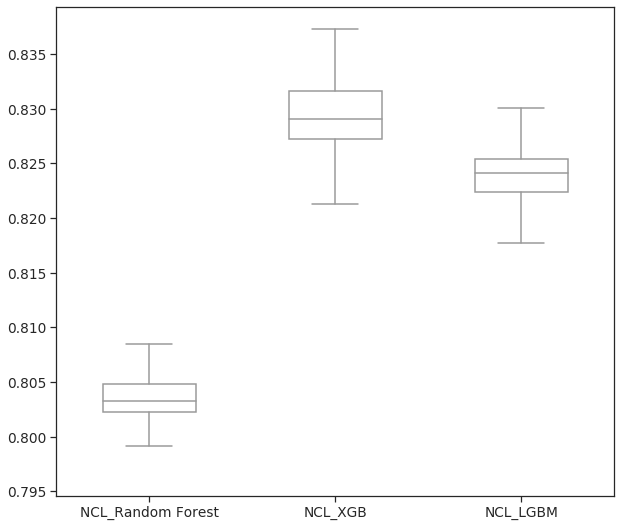

In [19]:
rf_f1_scores = benchmark_tuned_results["random_forest"]["ALL"]["metrics_iterations"]["recall"].values
xgb_f1_scores = tuned_results["xg_boost"]["ALL"]["metrics_iterations"]["recall"].values
lgbm_f1_scores = tuned_results["light_boost"]["ALL"]["metrics_iterations"]["recall"].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=1.25)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores], 
            x=["NCL_Random Forest", "NCL_XGB", "NCL_LGBM"],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("exp2_nclnoaa_boxplot_recall.png")

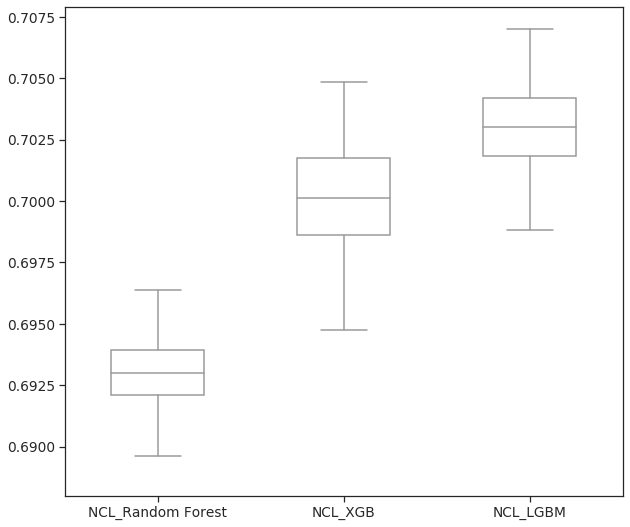

In [20]:
rf_f1_scores = benchmark_tuned_results["random_forest"]["ALL"]["metrics_iterations"]["f1"].values
xgb_f1_scores = tuned_results["xg_boost"]["ALL"]["metrics_iterations"]["f1"].values
lgbm_f1_scores = tuned_results["light_boost"]["ALL"]["metrics_iterations"]["f1"].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=1.25)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores], 
            x=["NCL_Random Forest", "NCL_XGB", "NCL_LGBM"],  
            color='white', 
            orient="v",
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("exp2_nclnoaa_boxplot_f1.png")